In [3]:
data = '''id,X,Y
1,14,36
2,21,49
3,25,72
4,8,24
5,20,56
6,18,48
7,17,51
8,3,10
9,1,3
10,10,32'''

In [4]:
import pandas as pd
import io
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv(io.StringIO(data), index_col = 'id')
data

,X,Y
id,,
1,14,36
2,21,49
3,25,72
4,8,24
5,20,56
6,18,48
7,17,51
8,3,10
9,1,3


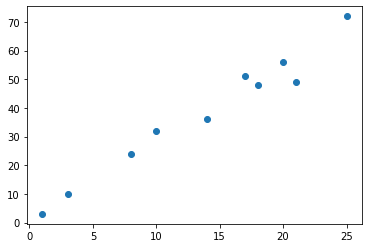

In [7]:
plt.scatter(data.X, data.Y);


In [8]:
print(data.X.mean())
print(data.Y.mean())

13.7
38.1


In [9]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [13]:
X_train = pd.DataFrame(data.X)
y_train = pd.DataFrame(data.Y)
X_train

,X
id,
1,14
2,21
3,25
4,8
5,20
6,18
7,17
8,3
9,1


In [12]:
#обучаем модель линейной регрессии
reg_model = LinearRegression().fit(X_train, y_train)

In [20]:
# Тета 0
O = reg_model.intercept_
O

array([1.95700052])

In [19]:
round(float(O),2)

1.96

In [23]:
# Тета 1
O1 = reg_model.coef_
round(float(O1),2)

2.64

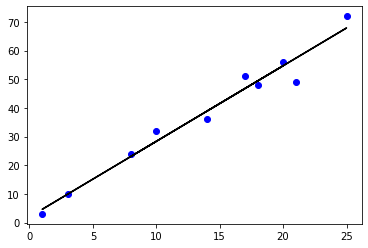

In [24]:
plt.scatter(data.X, data.Y, color="blue")
plt.plot(data.X, reg_model.predict(X_train), color="black")

plt.show()

In [26]:
# Для нахождения 𝑅2
# предсказываем значения Y используя обученную модель
y_predicted = reg_model.predict(X_train)
y_predicted

array([[38.89145254],
       [57.35867855],
       [67.91137913],
       [23.06240168],
       [54.72050341],
       [49.44415312],
       [46.80597798],
       [ 9.87152596],
       [ 4.59517567],
       [28.33875197]])

In [28]:
from sklearn.metrics import r2_score
# Оценка R2 – это один из показателей оценки эффективности моделей
R2 = r2_score(y_train, y_predicted)
round(R2,2)

0.97

In [30]:
# Задание 2
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')
DATA

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [32]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['One dime','Nestle Butterfinger'])
train_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [34]:
#отбираем данные для предикторов, удаляя два последних столбца, индекс не включается в данные.
X_train = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))
X_train

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767
...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116


In [36]:
#указываем столбец отклика
y_train = pd.DataFrame(train_data['winpercent'])
y_train

,winpercent
competitorname,
100 Grand,66.971725
3 Musketeers,67.602936
One quarter,46.116505
Air Heads,52.341465
Almond Joy,50.347546
...,...
Snickers Crisper,59.529251
Sour Patch Kids,59.863998
Sour Patch Tricksters,52.825947


In [39]:
#обучение модели
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression()

In [42]:
#предсказание для конфет введеных вручную
reg.predict([[0, 1, 1, 1, 1, 1, 1, 0, 1, 0.26, 0.296]])

array([[57.51458634]])

In [45]:
#предсказание для конфет из таблицы
#выбираем строку из таблицы
AirHeads = DATA.loc[['One dime']]
#отбираем данные для предикторов и выполняем предсказание с помощью модели
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([[36.63093922]])

In [47]:
AirHeads = DATA.loc[['Nestle Butterfinger']]
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([[62.8766418]])

In [48]:
Значение коэффициента 𝜃0
reg.intercept_

array([32.49207971])

Значение коэффициентов 𝜃1,…,𝜃𝑝

reg.coef_

array([[ 27.80862379,  13.22742764,  -1.72139799,   9.31066552,
          2.47147143,   9.97210163,  -7.20313458,  -3.36948719,
         -1.92311592,  12.33760078, -10.75867374]])

y_predicted = reg.predict(X_train)


r2_score(y_train, y_predicted)

SyntaxError: invalid syntax (<ipython-input-48-cb5538cdffa9>, line 1)